In [1]:

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os, sys
import seaborn as sns
import multiprocessing
%matplotlib inline

In [2]:
os.getcwd()
os.chdir('C:\\Users\\Ben\\Documents\\682_project')

In [3]:
with open('data/captains_mode_dataset.pickle', 'rb') as f:
    d = pickle.load(f)

In [50]:
len(d)

55409

In [4]:
with open('scripts/all_pick_pretrain_train_hist.pickle', 'rb') as f:
    train_hist = pickle.load(f)
with open('scripts/all_pick_pretrain_test_hist.pickle', 'rb') as f:
    test_hist = pickle.load(f)   

In [4]:
train_hist.keys()

dict_keys(['epoch', 'step', 'masked_hero_acc', 'top_5_acc', 'cluster_acc', 'win_acc', 'loss'])

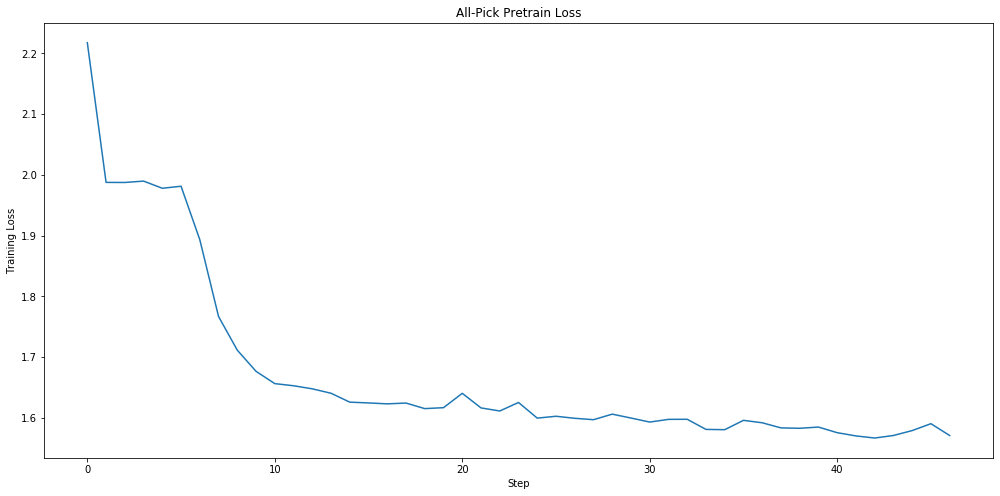

In [41]:
fig, ax = plt.subplots(figsize=(17, 8))
ax.plot(train_hist['loss'])
plt.xlabel('Step')
plt.ylabel('Training Loss')
plt.title('All-Pick Pretrain Loss')
plt.savefig('all_pick_loss.png')

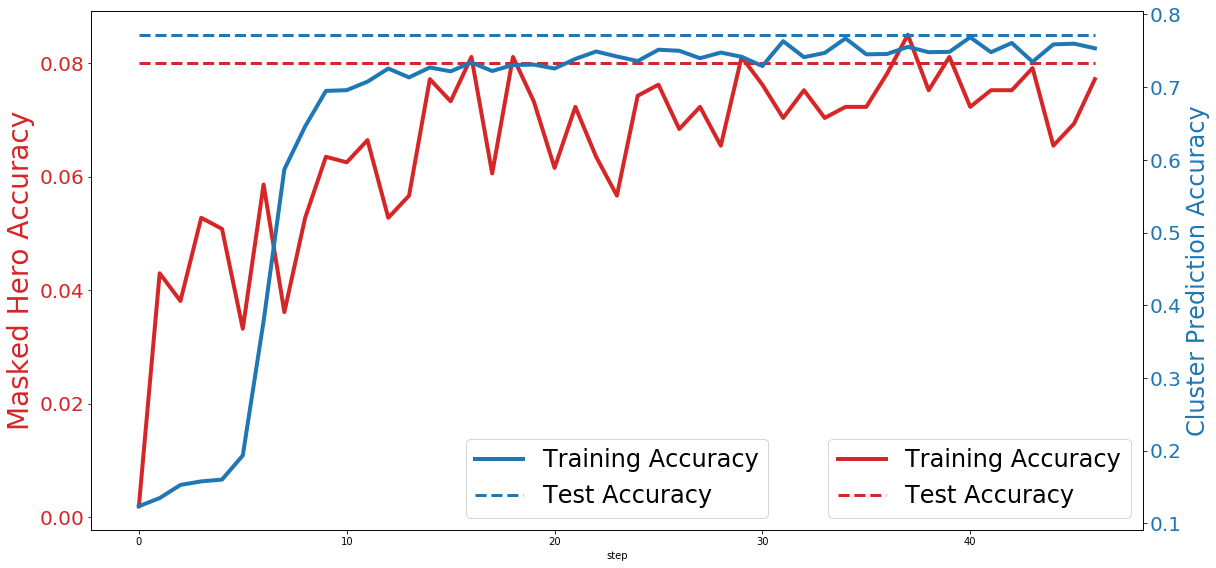

In [11]:
fig, ax1 = plt.subplots(figsize=(17, 8))

color = 'tab:red'
ax1.set_xlabel('step')
ax1.set_ylabel('Masked Hero Accuracy', color=color, fontsize=28)
ax1.plot(train_hist['masked_hero_acc'], color=color, linewidth=4)
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)
ax1.plot(range(len(train_hist['masked_hero_acc'])), [np.mean(test_hist['masked_hero_acc'])] * len(train_hist['masked_hero_acc']),
         '--', color=color, linewidth=3)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cluster Prediction Accuracy', color=color, fontsize=24)  # we already handled the x-label with ax1
ax2.plot(train_hist['cluster_acc'], color=color, linewidth=4)
ax2.tick_params(axis='y', labelcolor=color, labelsize=20)
ax2.plot(range(len(train_hist['masked_hero_acc'])), [np.mean(test_hist['cluster_acc'])] * len(train_hist['masked_hero_acc']),
         '--', color=color, linewidth=3)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right', fontsize=24)
ax2.legend(['Training Accuracy', 'Test Accuracy'], loc='lower center', fontsize=24)
plt.savefig('all_pick_accuracies.png')